In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

## ROC
* Receiver Operation Characteristic
* 수신자 판단 곡선 
* 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
    + 레이더 데이터를 분석하여 적 항공기와 신호 소음을 구별하는 데 사용
    + 수신기의 감도가 증가함에 따라 거짓 긍정의 수(즉, 특이성)이 감소함
* 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용
* ROC곡선의 y축은 '민감도TPR'를, x축은 '1-재현율FPR'로 그림

    + FPR : FP/(TN+FP) : 아군항공기 소리를 적항공기 소리라고 오판한 비율 - 낮아야 함
    + TPR : TP/(TP+FN) : 적항공기 소리를 적항공기 소리라고 잘판단한 비율 - 높아야 함
    + FPR이 변할때 TPR이 어떻게 변하는지 알아봄

* 모델이 양성/긍정으로 예측했을때 얼마나 잘 맞추고 있는지를 설명한 것

### ROC 그래프 그리기
* 타이타닉 데이터셋으로 로지스틱회귀 분석한 후
* 특이도, 재현율을 구한후 ROC 그래프 작성

In [50]:
titanic = pd.read_csv('data/titanic2.csv')

In [51]:
data = titanic.iloc[:,:8]
target = titanic.survived

In [52]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211171140)

In [55]:
lrclf = LogisticRegression(max_iter=500)

lrclf.fit(X_train, Y_train)
pred = lrclf.predict(X_test)

accuracy_score(Y_test,pred)

0.8061224489795918

In [28]:
confusion_matrix(Y_test,pred)

array([[193,  50],
       [ 41, 108]], dtype=int64)

In [29]:
# 정확도
accuracy_score(Y_test,pred)

0.7678571428571429

In [31]:
# 정밀도
precision_score(Y_test,pred)

0.6835443037974683

In [32]:
# 재현율
recall_score(Y_test,pred)

0.7248322147651006

In [35]:
41/(41+108)

0.2751677852348993

## 분류 알고리즘 종류
* 판별함수 모형
    + 주어진 데이터를 범주category에 따라 서로 다른 영역으로 나누는 경계면decision boundary을 찾아낸 후, 이 경계면을 기준으로 데이터가 어디에 있는지를 계산하는 함수를 이용
* 확률적 판별/생성 모형 
    + 주어진 데이터에 대해 각 범주category/레이블이 정답일 조건부확률을 계산하는 방법에 따라 **조건부 확률함수를 추정**하거나 베이즈 정리를 사용해서 분류하는 모형
* 따라서, 분류기의 **예측 불확실성**을 추정하려면 scikit-learn에서 제공하는 2가지 함수를 사용
     + decision function, `predict_proba`


### 타이타닉 생존 예측확률 알아보기 1

In [58]:
X_test[:3]

,pclass,age,sibsp,parch,fare,gender,Embarked,Title
951,3,22.0,0,0,7.2250,1,0,13
364,2,54.0,1,0,26.0000,1,2,16
1125,3,19.0,0,0,7.8958,1,2,13


In [59]:
# 판별함수 모형으로 생존여부 확인 : 이산형 수치로 출력
lrclf.predict(X_test[:3])

array([0, 0, 0], dtype=int64)

In [60]:
# 확률적 판별/생lrclf.predict_(X_test[:3])성 모형으로 생존여부 확인
lrclf.predict_proba(X_test[:3])

array([[0.81781522, 0.18218478],
       [0.90536551, 0.09463449],
       [0.87151445, 0.12848555]])

### 타이타닉 승객 생존 여부 확률값 추출
+ 타이타닉 승객 생존 여부에서 생존(1)이 주된 관심사이므로
+ 생존에 대한 확률값만 따로 추출

In [61]:
pred_proba = lrclf.predict_proba(X_test)
pred_proba[:3,1]

array([0.18218478, 0.09463449, 0.12848555])

In [66]:
# 실제값, 확률값, 예측값을
# 하나의 데이터프레임으로 작성
table = pd.DataFrame()
table['실제값'] = Y_test
table['생존 활률값'] = pred_proba[:,1]
table['예측값'] = lrclf.predict(X_test)

In [67]:
table.head()

,실제값,생존 활률값,예측값
951,1,0.182185,0
364,0,0.094634,0
1125,0,0.128486,0
1170,0,0.188228,0
393,1,0.822625,1


### 각 예측값 별 특이도fprs, 민감도/재현율tprs, 임계값을 구함
+ tprs : 실제값이 양성(승객 생존)이고 예측값이 양성(승객 생존)으로 예측되는 정도
+ fprs : 실제값이 음성(승객 사망)인데 예측값이 양성(승객 생존)으로 예측되는 정도
+ thresholds : 임계값

In [72]:
fprs, tprs, thresholds = roc_curve(Y_test,pred_proba[:,1])
print('양성tprs 결과', tprs[:5])
print('양성fprs 결과', fprs[:5])
print('임계값 결과', thresholds[:5])
# 임계값에 따라 tprs, fprs 가 달라져 보임

양성tprs 결과 [0.         0.00671141 0.20134228 0.20134228 0.36912752]
양성fprs 결과 [0.         0.         0.         0.00411523 0.00411523]
임계값 결과 [1.94469716 0.94469716 0.88689677 0.87541853 0.78352177]


## 특이도fprs, 민감도/재현율tprs 시각화

In [74]:
# 특이도, 민감도, 임계값을 데이터프레임에 합침
roc = pd.DataFrame({'tprs':tprs,'fprs':fprs,'thresholds':thresholds})

roc.head()

,tprs,fprs,thresholds
0,0.000000,0.000000,1.944697
1,0.006711,0.000000,0.944697
2,0.201342,0.000000,0.886897
3,0.201342,0.004115,0.875419
4,0.369128,0.004115,0.783522


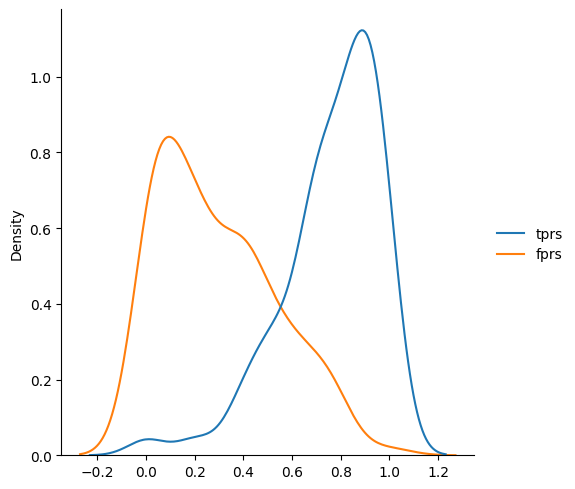

In [76]:
sns.displot(roc.iloc[:, [0,1]],kind = 'kde')
plt.show()

### 최적임계값 알아보기
+ argmax : 가장 큰값을 지닌 요소의 index값 출력

In [77]:
optidx = np.argmax(tprs - fprs)
thresholds[optidx]

0.6331691748111533

### ROC 그래프 그리기
+ 분류를 잘 하는 모델일수록 커브는 1에 가깝게 표시
+ fpr, tpr 그래프의 겹친 부분이 크다 - 변별력 낮음 - 곡선이 0에 가깝게 붙어서 출력
+ fpr, tpr 그래프가 겹친 부분이 작다 - 변별력 높음 - 곡선이 1에 가깝게 붙어서 출력

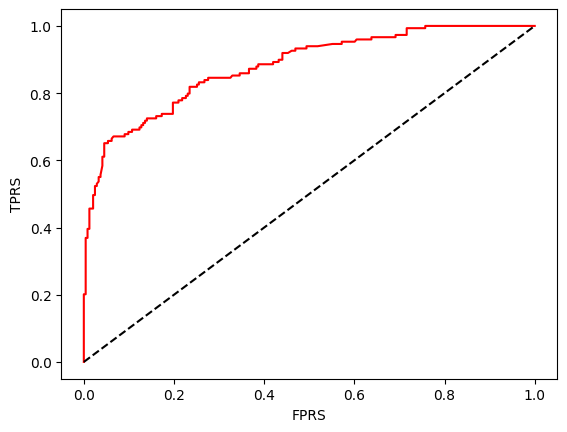

In [79]:
plt.plot(fprs, tprs,'r')
plt.plot([0,1],[0,1],'k--')

plt.xlabel('FPRS')
plt.ylabel('TPRS')

plt.show()

## AUC
* Area Under Curve
* ROC 곡선 밑의 면적을 구한 값
* 1에 가까울 수록 좋은 수치를 의미함
    + 0.9 ~ 1 : excellent
    + 0.8 ~ 0.9 : good
    + 0.7 ~ 0.8 : normal

In [81]:
roc_auc_score(Y_test,pred)

0.7852072803601514